In [1]:
import MDAnalysis as mda
import numpy as np
import pandas as pd

In [2]:
u = mda.Universe("qubekit_aimd_60ps.xyz")
energy = pd.read_excel("S1_energy.xlsx")


In [3]:
energy

,Iter,Energy,OSC,Broden,Target
0,1,2.946378,1.2548,0.000,0
1,2,2.980995,1.2795,0.000,0
2,3,2.976833,1.2378,0.000,0
3,4,2.955466,1.1664,0.000,0
4,5,2.909876,1.2063,0.000,0
...,...,...,...,...,...
25895,25896,2.983361,0.9884,0.107,1
25896,25897,3.019601,1.0557,0.107,1
25897,25898,3.023717,1.1045,0.107,1
25898,25899,3.024612,1.0813,0.107,1


In [4]:
num_atoms = len(u.atoms)
num_atoms

32

In [5]:
columns = []
data = []
check=0

for i in range(num_atoms):
    for j in range(i + 1, num_atoms):
        # Select the atoms forming the bond
        atom1 = u.atoms[i]
        atom2 = u.atoms[j]

        # Get the positions of the atoms
        positions1 = u.trajectory.ts.positions[atom1.index]
        positions2 = u.trajectory.ts.positions[atom2.index]

        # Iterate over the frames and calculate bond lengths
        check=check+1
        bond_lengths = []
        for ts in u.trajectory:
            bond_length = np.linalg.norm(positions1 - positions2)
            bond_lengths.append(bond_length)
            #print(check)
           # print(f"Frame: {ts.frame}, Bond Length ({atom1.index}-{atom2.index}): {bond_length:.3f} Å")
            
        feature_name = f"{atom1.index}-{atom2.index}"
        columns.append(feature_name)
        data.append(bond_lengths)

data = np.transpose(data)        
df=pd.DataFrame(data, columns=columns)
            

In [6]:
print(df)

            0-1       0-2       0-3       0-4       0-5       0-6       0-7  \
0      1.338931  2.401654  3.623617  4.114594  3.569502  2.341675  4.684158   
1      1.349385  2.440525  3.620397  4.135856  3.552390  2.346999  4.671528   
2      1.337297  2.462425  3.620982  4.148597  3.563697  2.331767  4.665050   
3      1.331367  2.444393  3.648741  4.169327  3.604075  2.328541  4.692409   
4      1.327205  2.409060  3.687100  4.182484  3.613422  2.328906  4.714856   
...         ...       ...       ...       ...       ...       ...       ...   
25895  1.357524  2.468607  3.670860  4.199665  3.640453  2.395519  4.749769   
25896  1.372949  2.425210  3.673982  4.226807  3.667451  2.412172  4.773499   
25897  1.375796  2.390681  3.679595  4.234204  3.686949  2.436490  4.801999   
25898  1.365454  2.393359  3.666442  4.212469  3.697872  2.450132  4.820125   
25899  1.366486  2.410361  3.652740  4.189393  3.709054  2.452843  4.828147   

            0-8       0-9      0-10  ...     27-28 

In [7]:
df.describe()

,0-1,0-2,0-3,0-4,0-5,0-6,0-7,0-8,0-9,0-10,...,27-28,27-29,27-30,27-31,28-29,28-30,28-31,29-30,29-31,30-31
count,25900.000000,25900.000000,25900.000000,25900.000000,25900.000000,25900.000000,25900.000000,25900.000000,25900.000000,25900.000000,...,25900.000000,25900.000000,25900.000000,25900.000000,25900.000000,25900.000000,25900.000000,25900.000000,25900.000000,25900.000000
mean,1.354726,2.409981,3.652999,4.171859,3.635079,2.401953,4.745326,5.946352,6.254293,5.518881,...,2.439013,6.784320,5.958454,4.460122,4.855420,3.615235,2.068259,2.326858,3.623348,1.747888
std,0.025778,0.041141,0.043074,0.046752,0.042301,0.039678,0.055224,0.054724,0.052038,0.054155,...,0.073865,0.067099,0.092808,0.120700,0.089577,0.102796,0.117319,0.105844,0.076091,0.042904
min,1.260667,2.261799,3.483810,3.975939,3.467265,2.239075,4.486276,5.725051,6.053229,5.271838,...,2.154124,6.513215,5.513930,3.942356,4.508286,3.247937,1.661370,1.918802,3.302458,1.576389
25%,1.336262,2.382086,3.623205,4.140699,3.606630,2.375041,4.708920,5.910620,6.219198,5.482285,...,2.389950,6.739988,5.895739,4.377796,4.795754,3.545445,1.988237,2.255065,3.572016,1.718943
50%,1.353314,2.409228,3.652159,4.171070,3.634506,2.401356,4.745706,5.946286,6.253987,5.518630,...,2.439393,6.784019,5.958661,4.459811,4.856275,3.613910,2.064957,2.325336,3.623625,1.747418
75%,1.371582,2.437164,3.681589,4.203047,3.663213,2.428622,4.782343,5.982426,6.289301,5.554747,...,2.488802,6.829494,6.019879,4.540438,4.914808,3.683612,2.145294,2.396911,3.674352,1.776169
max,1.463277,2.581482,3.835606,4.348164,3.837296,2.556954,4.969958,6.177178,6.488205,5.728374,...,2.723587,7.038585,6.342679,4.963231,5.316150,4.057991,2.542524,2.773747,3.919695,1.936420


In [8]:
average_lengths = df.mean()

In [9]:
filtered_df = df.loc[:, average_lengths <= 2.0]

In [10]:
print(filtered_df)

            0-1      0-20      0-21       1-2       1-6       2-3      2-22  \
0      1.338931  0.999952  1.030194  1.405549  1.426278  1.402695  1.101324   
1      1.349385  1.048695  1.011679  1.424994  1.417782  1.352575  1.079219   
2      1.337297  1.151278  1.034240  1.453580  1.404253  1.317656  1.080539   
3      1.331367  0.930489  1.007633  1.449405  1.395399  1.345574  1.097540   
4      1.327205  1.130485  1.020520  1.418587  1.403203  1.405797  1.070205   
...         ...       ...       ...       ...       ...       ...       ...   
25895  1.357524  1.022957  1.072137  1.457425  1.424074  1.348433  1.112844   
25896  1.372949  1.045775  1.013198  1.385728  1.435846  1.374663  1.087025   
25897  1.375796  1.019111  1.061777  1.364792  1.428499  1.397540  1.062847   
25898  1.365454  1.042437  1.044504  1.405035  1.403136  1.374746  1.125314   
25899  1.366486  1.035233  1.017518  1.450382  1.384329  1.344639  1.063870   

            3-4      3-23       4-5  ...     15-16 

In [11]:
columns = []
data = []

# Iterate over all atom combinations to calculate bond angles
for i in range(num_atoms):
    for j in range(i + 1, num_atoms):
        for k in range(j + 1, num_atoms):
            # Select the atoms forming the angle
            atom1 = u.atoms[i]
            atom2 = u.atoms[j]
            atom3 = u.atoms[k]

            # Get the positions of the atoms
            positions1 = u.trajectory.ts.positions[atom1.index]
            positions2 = u.trajectory.ts.positions[atom2.index]
            positions3 = u.trajectory.ts.positions[atom3.index]

            # Calculate bond lengths
            bond_length1 = np.linalg.norm(positions1 - positions2)
            bond_length2 = np.linalg.norm(positions2 - positions3)

            # Calculate bond angles only if the bond lengths satisfy the condition
            if bond_length1 < 2.0 and bond_length2 < 2.0:
                bond_angles = []
                for ts in u.trajectory:
                    vector1 = positions1 - positions2
                    vector2 = positions3 - positions2
                    angle = np.degrees(np.arccos(np.dot(vector1, vector2) / (np.linalg.norm(vector1) * np.linalg.norm(vector2))))
                    bond_angles.append(angle)

                # Store the bond angles along with the corresponding feature name
                feature_name = f"{atom1.index}-{atom2.index}-{atom3.index}"
                columns.append(feature_name)
                data.append(bond_angles)

# Transpose the data list to have bond angles as separate columns
data = np.transpose(data)

# Create a pandas DataFrame from the collected data
df2 = pd.DataFrame(data, columns=columns)

# Print the DataFrame
print(df2)

            0-1-2       0-1-6    0-20-21       1-2-3      1-2-22      1-6-24  \
0      122.091347  115.702126  36.786304  116.005142  125.911743  122.354881   
1      123.180954  116.002174  30.567724  117.245735  122.775322  119.109665   
2      123.791992  116.517311  26.348343  119.108276  117.377411  117.744133   
3      122.996056  117.270164  32.417976  120.699722  115.752014  119.001312   
4      122.617340  117.041130  34.276741  121.971397  117.804298  120.959160   
...           ...         ...        ...         ...         ...         ...   
25895  122.516884  118.884369  36.162376  119.100914  118.465210  123.511543   
25896  123.072342  118.345421  32.761940  120.940773  123.727722  125.490715   
25897  121.459160  120.637215  33.048409  122.196609  124.793221  121.870483   
25898  119.502388  124.491257  33.370975  122.677872  119.116142  115.455505   
25899  117.640961  126.168709  34.062389  122.081390  112.952850  113.594902   

            2-3-4      2-3-23       3-4

In [12]:
columns = []
data = []

# Iterate over all atom combinations to calculate dihedral angles
for i in range(num_atoms):
    for j in range(i + 1, num_atoms):
        for k in range(j + 1, num_atoms):
            for l in range(k + 1, num_atoms):
                # Select the atoms forming the dihedral angle
                atom1 = u.atoms[i]
                atom2 = u.atoms[j]
                atom3 = u.atoms[k]
                atom4 = u.atoms[l]

                # Get the positions of the atoms
                positions1 = u.trajectory.ts.positions[atom1.index]
                positions2 = u.trajectory.ts.positions[atom2.index]
                positions3 = u.trajectory.ts.positions[atom3.index]
                positions4 = u.trajectory.ts.positions[atom4.index]

                # Calculate bond lengths
                bond_length1 = np.linalg.norm(positions1 - positions2)
                bond_length2 = np.linalg.norm(positions2 - positions3)
                bond_length3 = np.linalg.norm(positions3 - positions4)

                # Calculate dihedral angles only if all bond lengths satisfy the condition
                if bond_length1 < 2.0 and bond_length2 < 2.0 and bond_length3 < 2.0:
                    dihedral_angles = []
                    for ts in u.trajectory:
                        vector1 = positions1 - positions2
                        vector2 = positions3 - positions2
                        vector3 = positions4 - positions3
                        dihedral = np.degrees(
                            np.arctan2(
                                np.linalg.norm(np.cross(np.cross(vector1, vector2), np.cross(vector2, vector3))),
                                np.dot(np.cross(vector1, vector2), np.cross(vector2, vector3))
                            )
                        )
                        dihedral_angles.append(dihedral)

                    # Store the dihedral angles along with the corresponding feature name
                    feature_name = f"{atom1.index}-{atom2.index}-{atom3.index}-{atom4.index}"
                    columns.append(feature_name)
                    data.append(dihedral_angles)

# Transpose the data list to have dihedral angles as separate columns
data = np.transpose(data)

# Create a pandas DataFrame from the collected data
df3 = pd.DataFrame(data, columns=columns)

# Print the DataFrame
print(df3)

         0-1-2-3    0-1-2-22    0-1-6-24     1-2-3-4  1-2-3-23     2-3-4-5  \
0      12.594035  174.937561  173.228149  166.841461  5.779141  167.384171   
1      13.390070  173.330505  170.484161  170.326401  4.568565  169.769928   
2      12.854435  172.506500  170.234421  176.092621  4.021165  174.567795   
3      10.556765  173.037964  172.116943  177.102737  3.315907  179.269562   
4       8.361659  173.394852  174.016373  171.233139  1.847729  173.529877   
...          ...         ...         ...         ...       ...         ...   
25895   2.800272  177.438431  175.584381  174.242645  5.970261  179.975494   
25896   3.149238  179.058411  177.546539  176.897293  7.552432  176.909286   
25897   4.003400  179.689117  178.427734  179.838547  5.608766  174.560333   
25898   4.788238  179.103409  178.839630  177.664322  1.827664  173.531540   
25899   5.083954  177.663147  179.761063  176.230957  1.629005  174.177429   

       2-3-4-10     3-4-5-6    3-4-5-7  4-5-6-24  ...  12-13-14

In [13]:
new_df=pd.concat([filtered_df,df2,df3,energy],axis=1)

In [14]:
new_df

,0-1,0-20,0-21,1-2,1-6,2-3,2-22,3-4,3-23,4-5,...,15-16-17-19,16-17-18-29,16-17-19-30,16-17-19-31,17-19-30-31,Iter,Energy,OSC,Broden,Target
0,1.338931,0.999952,1.030194,1.405549,1.426278,1.402695,1.101324,1.413288,1.113658,1.383597,...,174.472885,1.942653,10.653749,169.994263,0.605520,1,2.946378,1.2548,0.000,0
1,1.349385,1.048695,1.011679,1.424994,1.417782,1.352575,1.079219,1.419748,1.079362,1.437565,...,177.097992,10.881977,3.537956,172.917557,3.502726,2,2.980995,1.2795,0.000,0
2,1.337297,1.151278,1.034240,1.453580,1.404253,1.317656,1.080539,1.421663,1.067807,1.460456,...,179.588593,19.842545,6.431992,176.999222,8.750243,3,2.976833,1.2378,0.000,0
3,1.331367,0.930489,1.007633,1.449405,1.395399,1.345574,1.097540,1.420285,1.114805,1.445626,...,178.570938,23.950844,15.292101,178.236420,10.785319,4,2.955466,1.1664,0.000,0
4,1.327205,1.130485,1.020520,1.418587,1.403203,1.405797,1.070205,1.434328,1.054176,1.420636,...,177.686371,22.034912,20.645391,174.319122,12.152377,5,2.909876,1.2063,0.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25895,1.357524,1.022957,1.072137,1.457425,1.424074,1.348433,1.112844,1.411560,1.063688,1.401720,...,178.006332,0.045769,0.830012,153.498215,23.753551,25896,2.983361,0.9884,0.107,1
25896,1.372949,1.045775,1.013198,1.385728,1.435846,1.374663,1.087025,1.418876,1.124881,1.423938,...,178.634506,0.925959,5.203982,148.957382,30.691956,25897,3.019601,1.0557,0.107,1
25897,1.375796,1.019111,1.061777,1.364792,1.428499,1.397540,1.062847,1.422039,1.059172,1.428109,...,178.491745,0.966352,9.048571,147.800400,37.272499,25898,3.023717,1.1045,0.107,1
25898,1.365454,1.042437,1.044504,1.405035,1.403136,1.374746,1.125314,1.413079,1.098331,1.410551,...,177.916855,0.587566,10.181262,150.008545,38.877998,25899,3.024612,1.0813,0.107,1


In [15]:
from sklearn.linear_model import LinearRegression

# Assuming you have a DataFrame called 'data' with the features and target variable
# X represents the input features, and y represents the target variable (energy)
y = new_df['Energy']
new_df2 = new_df
new_df2 = new_df2.drop('Energy', axis=1)
new_df2 = new_df2.drop('Iter', axis=1)
new_df2 = new_df2.drop('OSC', axis=1)
new_df2 = new_df2.drop('Broden', axis=1)
new_df2 = new_df2.drop('Target', axis=1)
#new_df2 = new_df2.drop('Energy', axis=1)

In [16]:
new_df2

,0-1,0-20,0-21,1-2,1-6,2-3,2-22,3-4,3-23,4-5,...,12-13-14-27,13-14-15-16,13-14-15-28,14-15-16-17,15-16-17-18,15-16-17-19,16-17-18-29,16-17-19-30,16-17-19-31,17-19-30-31
0,1.338931,0.999952,1.030194,1.405549,1.426278,1.402695,1.101324,1.413288,1.113658,1.383597,...,4.039565,178.372147,0.374222,4.877505,3.728597,174.472885,1.942653,10.653749,169.994263,0.605520
1,1.349385,1.048695,1.011679,1.424994,1.417782,1.352575,1.079219,1.419748,1.079362,1.437565,...,2.065990,175.992508,5.411832,1.317378,6.447982,177.097992,10.881977,3.537956,172.917557,3.502726
2,1.337297,1.151278,1.034240,1.453580,1.404253,1.317656,1.080539,1.421663,1.067807,1.460456,...,1.616800,171.192413,9.746678,1.969717,9.035660,179.588593,19.842545,6.431992,176.999222,8.750243
3,1.331367,0.930489,1.007633,1.449405,1.395399,1.345574,1.097540,1.420285,1.114805,1.445626,...,1.513673,167.882843,11.869228,4.545830,11.394583,178.570938,23.950844,15.292101,178.236420,10.785319
4,1.327205,1.130485,1.020520,1.418587,1.403203,1.405797,1.070205,1.434328,1.054176,1.420636,...,1.183891,166.365005,11.299053,5.792235,12.785371,177.686371,22.034912,20.645391,174.319122,12.152377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25895,1.357524,1.022957,1.072137,1.457425,1.424074,1.348433,1.112844,1.411560,1.063688,1.401720,...,0.393088,179.206497,5.994150,8.224195,11.080781,178.006332,0.045769,0.830012,153.498215,23.753551
25896,1.372949,1.045775,1.013198,1.385728,1.435846,1.374663,1.087025,1.418876,1.124881,1.423938,...,4.330211,177.130188,8.892451,9.567342,8.672909,178.634506,0.925959,5.203982,148.957382,30.691956
25897,1.375796,1.019111,1.061777,1.364792,1.428499,1.397540,1.062847,1.422039,1.059172,1.428109,...,4.529958,176.541672,8.254481,10.109962,6.529733,178.491745,0.966352,9.048571,147.800400,37.272499
25898,1.365454,1.042437,1.044504,1.405035,1.403136,1.374746,1.125314,1.413079,1.098331,1.410551,...,1.094496,177.838791,4.396869,9.536701,4.837049,177.916855,0.587566,10.181262,150.008545,38.877998


In [ ]:
new_df2
# Create an instance of the LinearRegression model
model = LogisticRegression()
# Fit the model to the data
model.fit(new_df2, y)




In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_ing =  new_df2.corr(method = 'pearson')
plt.figure(figsize=(20, 100))

heatmap = sns.heatmap(new_df2.corr()[['Energy']].sort_values(by='Energy', ascending=False), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
heatmap.set_title('Features Correlating with Sales Price', fontdict={'fontsize':18}, pad=16)
plt.show()

In [ ]:
new_df2 = new_df2.drop('Target', axis=1)

In [ ]:
new_df2.drop()

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_df2, y, test_size=0.3, random_state=42)

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [19]:
X_train.describe()

,0-1,0-20,0-21,1-2,1-6,2-3,2-22,3-4,3-23,4-5,...,12-13-14-27,13-14-15-16,13-14-15-28,14-15-16-17,15-16-17-18,15-16-17-19,16-17-18-29,16-17-19-30,16-17-19-31,17-19-30-31
count,18130.000000,18130.000000,18130.000000,18130.000000,18130.000000,18130.000000,18130.000000,18130.000000,18130.000000,18130.000000,...,18130.000000,18130.000000,18130.000000,18130.000000,18130.000000,18130.000000,18130.000000,18130.000000,18130.000000,18130.000000
mean,1.354658,1.035296,1.033332,1.429540,1.408396,1.365997,1.086069,1.417044,1.085724,1.415671,...,5.055831,175.538071,5.050971,5.210261,7.784251,171.854462,5.903271,7.233874,168.921051,12.629933
std,0.025712,0.022992,0.023027,0.023541,0.022194,0.018934,0.018860,0.022379,0.018508,0.023141,...,3.822979,3.348049,3.854620,3.983807,5.628450,5.877983,4.503094,5.616935,8.128800,9.170325
min,1.260667,0.941006,0.945923,1.335326,1.329380,1.302532,1.027563,1.339566,1.014757,1.322586,...,0.000262,153.353729,0.001492,0.000635,0.000904,139.439133,0.000315,0.000100,130.740082,0.000734
25%,1.336218,1.019300,1.016930,1.413447,1.393312,1.352825,1.072815,1.401617,1.072605,1.399910,...,2.007385,173.607033,2.016185,2.077401,3.282908,168.203388,2.353928,2.820593,163.953461,5.238739
50%,1.353276,1.034990,1.032570,1.429042,1.407945,1.365562,1.085775,1.416473,1.085342,1.415297,...,4.219421,176.228394,4.267245,4.337992,6.775465,172.900200,4.956657,6.042348,170.458809,10.929683
75%,1.371371,1.050442,1.048733,1.445226,1.422792,1.378477,1.099064,1.431921,1.098740,1.431081,...,7.335136,178.183537,7.245595,7.493519,11.283782,176.594776,8.472513,10.334700,175.467152,18.235711
max,1.452484,1.151278,1.125688,1.540283,1.501781,1.461474,1.153050,1.512379,1.155414,1.534893,...,25.148190,179.998734,30.685631,26.943880,36.098698,179.997910,36.705204,38.450954,179.997955,52.951168


In [ ]:
steps = [
         ('rescale', MinMaxScaler()),
         ('lr', LogisticRegression())]
model = Pipeline(steps)
model = model.fit(X_train, y_train)

In [37]:
def loss(data, X, y_true, model):
    '''Calculate the MAE, MSE and R2 of data (str) between true and prediction with model'''
    y_pred = model.predict(X)
    print(data, "MAE: {0:.2e}".format(mean_absolute_error(y_true, y_pred)))
    print(data, "MSE: {0:.2e}".format(mean_squared_error(y_true, y_pred)))
    print(data, "R2 score : {0:.3f}".format(r2_score(y_true, y_pred)))

In [ ]:
loss("train", X_train, y_train, model)

In [ ]:
loss("test", X_test, y_test, model)

In [21]:
model_name=["Linear Regression","Lasso", "Ridge", "Decision Tree Regression","Random Forest Regression","Gradient Boosting Regression", "XGBoost Regression"]
model_train_r2_score=[]
model_test_r2_score=[]

In [22]:
model_lr = Pipeline(steps= [('scale', MinMaxScaler()),
                     ('lr', LinearRegression())])
model_lr.fit(X_train,y_train)
y_train_pred_lr = model_lr.predict(X_train)
y_test_pred_lr = model_lr.predict(X_test)
model_train_r2_score.append(r2_score(y_train, y_train_pred_lr))
model_test_r2_score.append(r2_score(y_test, y_test_pred_lr))

In [ ]:
loss("train", X_train, y_train, model_lr)

In [23]:
model_la = Pipeline(steps= [('scale', MinMaxScaler()),
                     ('la', Lasso(max_iter=100000))])
model_la.fit(X_train,y_train)
y_train_pred_la = model_la.predict(X_train)
y_test_pred_la = model_la.predict(X_test)
model_train_r2_score.append(r2_score(y_train, y_train_pred_la))
model_test_r2_score.append(r2_score(y_test, y_test_pred_la))

In [24]:
model_rd = Pipeline(steps= [('scale', MinMaxScaler()),
                     ('rd', Ridge())])
model_rd.fit(X_train,y_train)
y_train_pred_rd = model_rd.predict(X_train)
y_test_pred_rd = model_rd.predict(X_test)
model_train_r2_score.append(r2_score(y_train, y_train_pred_rd))
model_test_r2_score.append(r2_score(y_test, y_test_pred_rd))

In [25]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from xgboost import XGBRegressor

In [26]:
model_dt = Pipeline(steps= [
                     ('dt', DecisionTreeRegressor(random_state=2000))])
model_dt.fit(X_train, y_train)
y_train_pred_dt = model_dt.predict(X_train)
y_test_pred_dt = model_dt.predict(X_test)
model_train_r2_score.append(r2_score(y_train, y_train_pred_dt))
model_test_r2_score.append(r2_score(y_test, y_test_pred_dt))

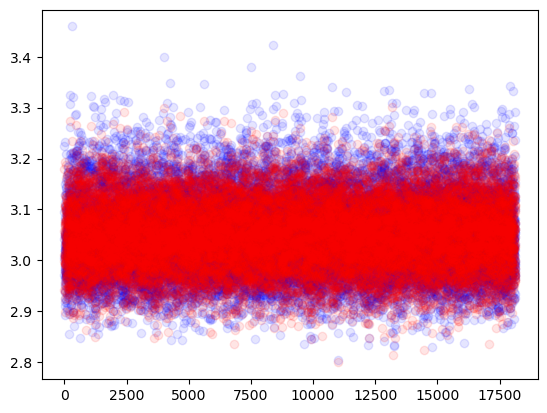

In [27]:
y_train
import matplotlib.pyplot as plt

plt.scatter(range(len(y_train)),y_train, label='Actual', color='blue', alpha=0.1)
plt.scatter(range(len(y_train_pred_lr)),y_train_pred_lr, label='Predicted', color='red', alpha=0.1)

In [28]:
model_rf = Pipeline(steps= [
                     ('rf', RandomForestRegressor(ccp_alpha=0.01, max_depth=2,
                                       min_samples_leaf=10,
                                       min_samples_split=20,random_state=2000))])
model_rf.fit(X_train, y_train)
y_train_pred_rf = model_rf.predict(X_train)
y_test_pred_rf = model_rf.predict(X_test)
model_train_r2_score.append(r2_score(y_train, y_train_pred_rf))
model_test_r2_score.append(r2_score(y_test, y_test_pred_rf))

In [29]:
model_gb = Pipeline(steps= [
                     ('gb', GradientBoostingRegressor(random_state=2000))])
model_gb.fit(X_train, y_train)
y_train_pred_gb = model_gb.predict(X_train)
y_test_pred_gb = model_gb.predict(X_test)
model_train_r2_score.append(r2_score(y_train, y_train_pred_gb))
model_test_r2_score.append(r2_score(y_test, y_test_pred_gb))

In [30]:
model_xgb = Pipeline(steps= [
                     ('xgb', XGBRegressor(random_state=2000))])
model_xgb.fit(X_train, y_train)
y_train_pred_xgb = model_xgb.predict(X_train)
y_test_pred_xgb = model_xgb.predict(X_test)
model_train_r2_score.append(r2_score(y_train, y_train_pred_xgb))
model_test_r2_score.append(r2_score(y_test, y_test_pred_xgb))

In [31]:
df_model=pd.DataFrame({'Model name':model_name, "Train R^2 score":model_train_r2_score, "Test R^2 score": model_test_r2_score })
df_model['Train R^2 score'] = df_model['Train R^2 score'].round(2)
df_model['Test R^2 score'] = df_model['Test R^2 score'].round(2)

In [32]:
df_model

,Model name,Train R^2 score,Test R^2 score
0,Linear Regression,0.74,0.73
1,Lasso,-0.00,-0.00
2,Ridge,0.74,0.73
3,Decision Tree Regression,1.00,0.09
4,Random Forest Regression,-0.00,-0.00
5,Gradient Boosting Regression,0.71,0.66
6,XGBoost Regression,0.94,0.70


In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
parameters_xgb = {'xgb__gamma': [0.0], 
              'xgb__learning_rate': [0.05, 0.07, 1.0], 
              'xgb__n_estimators': [50, 100, 200], 
              'xgb__max_depth': [5], 
              'xgb__lambda': [5, 10, 20], 
              'xgb__min_child_weight': [5, 10, 20]}
scorer_xgb = make_scorer(mean_squared_error, greater_is_better = False)

steps_xgb = [
         ('xgb', XGBRegressor(random_state=2000))]
model_xgb = Pipeline(steps_xgb)

In [34]:
model_gsv_xgb = GridSearchCV(model_xgb, parameters_xgb, cv = 5, scoring = scorer_xgb)
model_gsv_xgb = model_gsv_xgb.fit(X_train, y_train)

In [35]:
model_gsv_xgb.best_params_

{'xgb__gamma': 0.0,
 'xgb__lambda': 5,
 'xgb__learning_rate': 0.07,
 'xgb__max_depth': 5,
 'xgb__min_child_weight': 10,
 'xgb__n_estimators': 200}

In [38]:
loss("train", X_train, y_train, model_gsv_xgb)

train MAE: 2.35e-02
train MSE: 9.08e-04
train R2 score : 0.839


In [39]:
loss("test", X_test, y_test, model_gsv_xgb)

test MAE: 3.13e-02
test MSE: 1.61e-03
test R2 score : 0.719


In [ ]:
columns = ["Frame"] + [f"Atom{atom.index}" for atom in u.atoms]
data = []

# Iterate over all frames to calculate coordination numbers
for i, ts in enumerate(u.trajectory):
    # Get the positions of the atoms
    positions = ts.positions

    # Calculate the coordination numbers for each atom
    coordination_numbers = []
    for atom in u.atoms:
        if atom.index < positions.shape[0]:
            cutoff_distance = 2  # Set the cutoff distance for defining coordination
            neighbors = u.select_atoms(f"around {cutoff_distance} index {atom.index}")
            coordination_numbers.append(len(neighbors))

    # Append the coordination numbers for the current frame to the data list
    data.append([i] + coordination_numbers)

# Create a pandas DataFrame from the collected data
df_coordination = pd.DataFrame(data, columns=columns)

# Print the DataFrame
print(df_coordination)

In [ ]:
!pip install mdtraj

In [ ]:
import mdtraj as md
import pandas as pd

# Load the trajectory file
traj = md.load("MD.xyz")

# Define the hydrogen bonding criteria
donor_selection = "protein and name OH"  # Hydrogen bond donor selection
acceptor_selection = "water and name O"  # Hydrogen bond acceptor selection
distance_cutoff = 3.5  # Maximum donor-acceptor distance (angstroms)
angle_cutoff = 120.0  # Minimum donor-hydrogen-acceptor angle (degrees)

# Perform hydrogen bond analysis
hbonds = md.baker_hubbard(traj, distance_cutoff=distance_cutoff, angle_cutoff=angle_cutoff,
                          donors=donor_selection, acceptors=acceptor_selection)

# Get the hydrogen bond counts for each frame
hbond_counts = hbonds.sum(axis=1)

# Create a pandas DataFrame to store the results
df_hbonds = pd.DataFrame({"Frame": range(len(hbond_counts)), "HydrogenBondCount": hbond_counts})

# Print the DataFrame
print(df_hbonds)
